# Bio-inspired Algorithms using Intel® SigOpt

In this section, we will learn how to optimize the parameters and hyperparameters of bio-inspired  algorithms using the Intel® SigOpt.

## What is the Intel® SigOpt platform?

<p style='text-align: justify;'>
This platform is designed to help researchers, data scientists, and engineers automatically optimize the parameters and hyperparameters of their models, algorithms, and systems, rather than performing the optimization manually.
</p>    

## How does hyperparameter optimization work?

<p style='text-align: justify;'>
Hyperparameter optimization is a common problem in machine learning. Machine learning algorithms, from logistic regression to neural networks, rely on fine-tuned hyperparameters for maximum effectiveness. Different hyperparameter optimization strategies have varying performance and cost (time, money, and computation cycles). Evaluating optimization strategies could be more intuitive. Stochastic optimization strategies produce a distribution of the most found values. We can generalize this problem as given a function that accepts inputs and returns a numerical output. We can see the inputs, or parameters, that maximize the function's output. Since finding the best hyperparameters of a model is an arduous task that demands a lot of time and resources, we can see the hyperparameters that best fit the proposed model quickly and efficiently.
</p>  

## How to usage?

<p style='text-align: justify;'>
To use the platform, you must first register on the website Intel® SigOpt and then install the library.
</p>    

#### ⊗ Install library

In [1]:
!pip install sigopt

#### ⊗ Insert the API Key

<p style='text-align: justify;'>
    <strong> Atention! </strong>: To use the platform's API, as a last step, you must enter the key right after registration. Run the code below, click on the link, redeem your key and enter it.</p>

##### ⊗ Observation

<p style='text-align: justify;'>It is preferable that you register on the site and collect your own key, but if you do not wish to register, we will provide you with a generic key below:<strong> MJZRDBRNTMOPVYPCTTMRAMDIQDUEDTDJGOUMPFSIQTRKLYJJ</strong></p>

In [2]:
%load_ext sigopt
%sigopt config

SigOpt API token (find at https://app.sigopt.com/tokens/info):

  ········


Log Collection
	This will capture and upload the standard output and standard error of your
	Runs from the CLI and notebook cells so that you can view them on the SigOpt dashboard.
Enable log collection [y/N]:

  y


Notebook Cell Tracking
	This will record and upload the content of your notebook cells so that you can view them
	on the SigOpt dashboard.
Enable cell tracking [y/N]:

  y


## ☆ Challenge: Traveling through Spain ☆

Consider the following problem:
<p style="text-align: justify;">
After years dedicated to tending and protecting his precious plantations on the farm, a farmer finally decided to treat himself to well-deserved vacations and set off on a journey through the beautiful landscapes of Spain. He then decided to visit eight renowned cities during this unique adventure.
</p>

<p style="text-align: justify;">
Recognizing the value of time, the farmer understands the importance of finding the most efficient route to travel through all the cities, ensuring a seamless journey with the shortest travel time between each destination.
</p>
    
<p style="text-align: justify;">
The map of Spain takes the form of a graph, where cities are represented as nodes and the roads connecting them as edges. Each edge is associated with a distance in miles between each pair of cities. Although the farmer is free to choose a starting city, he must visit exactly eight distinct cities, avoiding revisits during his expedition.
</p>

<p style="text-align: center;">
 <img src="./images/figure08_cities.png"  width="500" height="500">
</p>

`Your mission is to assist the farmer in creating the optimal order to visit all the cities, allowing him to explore their wonders while spending the least amount of time on the road`. To do that, answer the following items:

a) Implement Intel® SigOpt in solutions using **AG**, **PSO** and **ACO**.

b) Compare the obtained **results and hyperparameters**.

### ☆ Solution ☆ 

<p style='text-align: justify;'>Here are some examples already seen in previous notebooks, but using Intel® SigOpt to perform parameter optimization.</p>

### ⊗ Genetic algorithm

<p style='text-align: justify;'>Below we will perform the optimization of the hyperparameters of the genetic algorithm relative to the solution of the previously proposed problem.</p>

#### Import Intel® SigOpt  and others libraries

<p style='text-align: justify;'>In this step, you can either include the library or use the key provided after registering on the site (We chose to import the library, as it is the most common and practical).</p>

In [3]:
import random
import time
import matplotlib.pyplot as plt
import sigopt

#### Implements genetic algorithm functions

<p style='text-align: justify;'>In this part you just have to create the functions, necessary for the implementation of the genetic algorithm, and provide the problem data.</p>

In [4]:
# City distance table (indexes are used as city representations)
distance_table = [
    [0, 620, 956, 621, 590, 349, 814, 296],
    [620, 0, 730, 395, 796, 969, 280, 324],
    [956, 730, 0, 335, 368, 609, 528, 660],
    [621, 395, 335, 0, 401, 642, 193, 325],
    [590, 796, 368, 401, 0, 241, 594, 726],
    [349, 969, 609, 642, 241, 0, 835, 645],
    [814, 280, 528, 193, 594, 835, 0, 518],
    [296, 324, 660, 325, 726, 645, 518, 0]
]

# Mapping city indexes to their respective names
city_names = {
    0: "Barcelona",
    1: "Bilbao",
    2: "Jaén",
    3: "Madrid",
    4: "Murcia",
    5: "Valencia",
    6: "Valladolid",
    7: "Zaragoza"
}

# Objective function (total path distance)
def total_distance(path):
    dist = 0
    for i in range(len(path) - 1):
        dist += distance_table[path[i]][path[i + 1]]
    dist += distance_table[path[-1]][path[0]] 
    return dist

# Step 1: Creating the population
def create_population(population_size, num_cities):
    population = []
    for _ in range(population_size):
        path = list(range(num_cities))
        random.shuffle(path)
        population.append(path)
    return population

# Step 2: Evaluation function (calculates fitness for each individual)
def evaluate_population(population):
    return [total_distance(path) for path in population]

# Step 3: Selection of parents (roulette wheel method)
def roulette_selection(population, fitness):
    total_fitness = sum(fitness)
    probabilities = [fit / total_fitness for fit in fitness]
    selected_parents = random.choices(population, weights=probabilities, k=2)
    return selected_parents

# Step 4: Crossover (partial order)
def crossover(parent1, parent2,CROSSOVER_RATE):
    if random.random() < CROSSOVER_RATE:
        start = random.randint(0, len(parent1) - 1)
        end = random.randint(start + 1, len(parent1))
        child = [-1] * len(parent1)

        for i in range(start, end):
            child[i] = parent1[i]

        idx = 0
        for city in parent2:
            if city not in child:
                while child[idx] != -1:
                    idx += 1
                child[idx] = city
        return child
    else:
        return parent1

# Step 5: Mutation (switching positions between two cities)
def mutate(path,MUTATION_RATE):
    if random.random() < MUTATION_RATE:
        idx1, idx2 = random.sample(range(len(path)), 2)
        path[idx1], path[idx2] = path[idx2], path[idx1]

<p style='text-align: justify;'>The function below is the same as previously seen in the genetic algorithm notebook, with only one modification, it must be passed parameters for which we want to optimize.</p>

In [5]:
# Run the genetic algorithm
def genetic_algorithm(population_size, max_generations, crossover_rate, mutation_rate):
    NUM_CITIES = len(distance_table)
    population = create_population(population_size, NUM_CITIES)
    best_distance = float('inf')
    best_path = []

    for generation in range(max_generations):
        fitness = evaluate_population(population)
        best_idx = fitness.index(min(fitness))
        current_best_path = population[best_idx]
        current_best_distance = total_distance(current_best_path)

        if current_best_distance < best_distance:
            best_distance = current_best_distance
            best_path = current_best_path[:]

        if generation == max_generations - 1:
            print(f"Generation {generation + 1}: Best Distance = {best_distance}")
            print("Best Path:", [city_names[idx] for idx in best_path])
            print("---------------------------------------")
            return best_path

        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = roulette_selection(population, fitness)
            child1 = crossover(parent1, parent2,crossover_rate)
            child2 = crossover(parent2, parent1,crossover_rate)
            mutate(child1,mutation_rate)
            mutate(child2,mutation_rate)
            new_population.extend([child1, child2])

        population = new_population

#### Intel® SigOpt Optimization

<p style='text-align: justify;'>    
Finally, the function below implements hyperparameter optimization using Intel® SigOpt
</p>

1. First, the function creates a connection to Intel® SigOpt using the provided API key. The connection is established with the Intel® SigOpt endpoint to send and receive data.

2. Next, an experiment is created in Intel® SigOpt. The experiment is defined with the name **Genetic Algorithm TSP Optimization** and the hyperparameter parameters to be optimized. Parameters include **population_size**, **max_generations**, **crossover_rate** and **mutation_rate**, each with its type and range of possible values.

3. Finally, a range of iterations must be defined where the Intel® SigOpt API will generate hyperparameters and test them using the **genetic_algorithm function**, obtaining as a result the best distance for the referred hyperparameters, at the end the best path to be performed will be returned, as well as the distance travelled.

In [8]:
# SigOpt Optimization Function
def sigopt_optimization():
    # Set your SigOpt API TOKEN or use generic API TOKEN
    conn = sigopt.Connection(client_token="MJZRDBRNTMOPVYPCTTMRAMDIQDUEDTDJGOUMPFSIQTRKLYJJ")
    
    # Creating the sigOpt experiment and defining which hyperparameters will be optimized as well as the range covered
    experiment = conn.experiments().create(
        name="Genetic Algorithm TSP Optimization",
        parameters=[
            {"name": "population_size", "type": "int", "bounds": {"min": 20, "max": 100}},
            {"name": "max_generations", "type": "int", "bounds": {"min": 500, "max": 2000}},
            {"name": "crossover_rate", "type": "double", "bounds": {"min": 0.6, "max": 0.9}},
            {"name": "mutation_rate", "type": "double", "bounds": {"min": 0.1, "max": 0.4}}
        ],
        observation_budget = 20,  # Number of total iterations
    )
    
    # Optimization iterations
    for _ in range(experiment.observation_budget):
        # Suggested hyperparameters by sigOpt
        suggestion = conn.experiments(experiment.id).suggestions().create()
        hyperparameters = suggestion.assignments
        print(f"Running with hyperparameters: {hyperparameters}")

        # Run the genetic algorithm with suggested hyperparameters
        best_path = genetic_algorithm(
            hyperparameters["population_size"],
            hyperparameters["max_generations"],
            hyperparameters["crossover_rate"],
            hyperparameters["mutation_rate"],
        )

        # Calculate the total distance for the best path
        best_distance = total_distance(best_path)

        # Report the observation to SigOpt
        conn.experiments(experiment.id).observations().create(
            suggestion=suggestion.id, value=best_distance
        )

    return best_path

#### Run code

In [9]:
if __name__ == "__main__":
    sigopt_optimization()

Running with hyperparameters: Assignments({
  "crossover_rate": 0.7210147083835483,
  "max_generations": 1039,
  "mutation_rate": 0.24004907510436607,
  "population_size": 35
})
Generation 1039: Best Distance = 2386
Best Path: ['Barcelona', 'Zaragoza', 'Bilbao', 'Valladolid', 'Madrid', 'Jaén', 'Murcia', 'Valencia']
---------------------------------------
Running with hyperparameters: Assignments({
  "crossover_rate": 0.6204042934296403,
  "max_generations": 1492,
  "mutation_rate": 0.13595723965286843,
  "population_size": 41
})
Generation 1492: Best Distance = 2386
Best Path: ['Valladolid', 'Madrid', 'Jaén', 'Murcia', 'Valencia', 'Barcelona', 'Zaragoza', 'Bilbao']
---------------------------------------
Running with hyperparameters: Assignments({
  "crossover_rate": 0.7904156538080483,
  "max_generations": 828,
  "mutation_rate": 0.39571897205690976,
  "population_size": 61
})
Generation 828: Best Distance = 2386
Best Path: ['Jaén', 'Madrid', 'Valladolid', 'Bilbao', 'Zaragoza', 'Barce

### ⊗ ACO

<p style='text-align: justify;'>
In the same way as the genetic algorithm, the functions used must first be repeated and then the sigopt function will be implemented below:
</p>

In [10]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
from geopy.distance import geodesic


cities = {
    ("Murcia", "Jaén"): 368,
    ("Murcia", "Valencia"): 241,
    ("Murcia", "Madrid"): 401,
    ("Jaén", "Madrid"): 335,
    ("Madrid", "Valladolid"): 193,
    ("Madrid", "Bilbao"): 395,
    ("Madrid", "Zaragoza"): 325,
    ("Valladolid", "Bilbao"): 280,
    ("Bilbao", "Zaragoza"): 324,
    ("Zaragoza", "Barcelona"): 296,
    ("Valencia", "Murcia"): 241,
    ("Valencia", "Barcelona"): 349
}

# Convert the city names to a set of unique city names
unique_cities = set(sum(cities, ()))


def distance(city1, city2):
    if (city1, city2) in cities:
        return cities[(city1, city2)]
    elif (city2, city1) in cities:
        return cities[(city2, city1)]
    elif city1 == city2:
        return 0
    else:
        return float('inf')  # Return a large value for non-connected cities
    
def total_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance(route[i], route[i + 1])
    total_distance += distance(route[-1], route[0])  # Return to the starting city
    return total_distance

def get_coordinates(city):
    geolocator = Nominatim(user_agent="city_locator")
    location = geolocator.geocode(city)
    return location.latitude, location.longitude

def plot_route(best_route):
    plt.figure(figsize=(10, 8))
    for i in range(len(best_route) - 1):
        city1, city2 = best_route[i], best_route[i + 1]
        distance_between_cities = distance(city1, city2)
        coords1 = get_coordinates(city1)
        coords2 = get_coordinates(city2)
        plt.plot([coords1[1], coords2[1]], [coords1[0], coords2[0]], 'b', linewidth=1)
        plt.scatter(coords1[1], coords1[0], color='blue', marker='o')
        plt.scatter(coords2[1], coords2[0], color='blue', marker='o')
        plt.text(coords1[1], coords1[0], city1, fontsize=12, ha='center', va='center', color='red')
        plt.text(coords2[1], coords2[0], city2, fontsize=12, ha='center', va='center', color='red')
        mid_latitude = (coords1[0] + coords2[0]) / 2
        mid_longitude = (coords1[1] + coords2[1]) / 2
        plt.text(mid_longitude, mid_latitude, f"{distance_between_cities} km", fontsize=10, ha='center', va='center', color='black')
    plt.title("Best Route")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid()
    plt.show()
    

class Ant:
    def __init__(self, cities, alpha, beta):
        self.cities = cities
        self.alpha = alpha
        self.beta = beta
        self.path = []  # Stores the path taken by the ant (list of cities)
        self.visited = set()  # Set to keep track of visited cities
        self.current_city = None  # The current city the ant is in
        self.unique_cities = unique_cities  # Set of unique city names

    def select_next_city(self, pheromone_matrix):
        unvisited_cities = [city for city in self.unique_cities if city not in self.visited and city != self.current_city]

        probabilities = []
        total = 0

        for city in unvisited_cities:
            distance_to_city = distance(self.current_city, city)

            if(distance_to_city > 0):  # Two different cities
                pheromone = pheromone_matrix[self.current_city][city]
                probabilities.append((pheromone ** self.alpha) * (1.0 / distance_to_city) ** self.beta)
            else:
                probabilities.append(0)

            total += probabilities[-1]

        if(total > 0):
            probabilities = [p / total for p in probabilities]
        else:
            probabilities = [0 for p in probabilities]
        
        if(sum(probabilities) > 0.9):
            selected_city = np.random.choice(unvisited_cities, size=1, p=probabilities)[0]
            self.path.append(selected_city)
            
            self.visited.add(selected_city)
            self.current_city = selected_city

    def complete_route(self):
        self.path.append(self.path[0])

def ant_colony_optimization(cities, num_ants, num_iterations, alpha, beta, evaporation):
    num_cities = len(unique_cities)
    pheromone_matrix = {city1: {city2: 1.0 for city2 in unique_cities if city1 != city2} for city1 in unique_cities}

    best_route = None
    best_distance = float('inf')  # Set an initial value for best_distance

    for _ in range(num_iterations):
        ants = [Ant(unique_cities, alpha, beta) for _ in range(num_ants)]

        starting_cities = list(unique_cities)
        np.random.shuffle(starting_cities)
        starting_cities = starting_cities * num_ants  # Repeat the starting cities to match the number of ants

        # Initialize each ant's current city randomly
        for i, ant in enumerate(ants):
            ant.current_city = starting_cities[i]
            ant.visited.add(ant.current_city[0])

        # Construct the complete tour for each ant
        for _ in range(num_cities):
            for ant in ants:
                ant.select_next_city(pheromone_matrix)

        # Calculate the total distance of each ant's tour
        for ant in ants:
            ant_total_distance = total_distance(ant.path)

            if ant_total_distance < best_distance:
                if(len(ant.path) == len(unique_cities)): # Checking if that path is a valid one
                    best_route = ant.path.copy()
                    best_distance = ant_total_distance

        # Update pheromone levels
        for city1 in unique_cities:
            for city2 in unique_cities:
                if city1 != city2:
                    pheromone_matrix[city1][city2] *= (1 - evaporation)

        for ant in ants:
            if len(ant.path) >= 2:
                if(best_distance > 0):
                    pheromone_delta = 1.0 / best_distance
                    for i in range(len(ant.path) - 1):
                        city1, city2 = ant.path[i], ant.path[i + 1]                                     
                        pheromone_matrix[city1][city2] += pheromone_delta
        
    best_route.append(best_route[0])  # Just adding the last path to go back

    return best_route, best_distance

#### Intel® SigOpt Optimization

In [15]:
import sigopt

def evaluate_ant_colony(params):
    num_ants = params['num_ants']
    num_iterations = params['num_iterations']
    alpha = params['alpha']
    beta = params['beta']
    evaporation = params['evaporation']
    
    # Call the ant_colony_optimization function and return the result you want to optimize
    best_route, best_distance = ant_colony_optimization(cities, num_ants, num_iterations, alpha, beta, evaporation)
    
    return best_distance

def sigopt_optimization():
    # Set your SigOpt API TOKEN or use generic API TOKEN
    SIGOPT_API_TOKEN = 'MJZRDBRNTMOPVYPCTTMRAMDIQDUEDTDJGOUMPFSIQTRKLYJJ'

    # Configure the SigOpt client
    conn = sigopt.Connection(client_token=SIGOPT_API_TOKEN)

    # Define the variables to be optimized and their ranges
    param_space = [
        {'name': 'num_ants', 'type': 'int', 'bounds': {'min': 5, 'max': 50}},
        {'name': 'num_iterations', 'type': 'int', 'bounds': {'min': 10, 'max': 500}},
        {'name': 'alpha', 'type': 'double', 'bounds': {'min': 0.1, 'max': 2.0}},
        {'name': 'beta', 'type': 'double', 'bounds': {'min': 0.1, 'max': 2.0}},
        {'name': 'evaporation', 'type': 'double', 'bounds': {'min': 0.1, 'max': 0.9}},
    ]

    # Create an experiment on SigOpt
    experiment = conn.experiments().create(
        name='TSP ACO Optimization',
        parameters=param_space,
        metrics=[{'name': 'best_distance', 'objective': 'minimize'}]
    )

    # Run the optimization for a number of iterations
    for _ in range(30):
        suggestion = conn.experiments(experiment.id).suggestions().create()
        suggestion_id = suggestion.id
        
        # Get the suggested hyperparameters
        suggested_params = suggestion.assignments
        
        # Evaluate the performance with the suggested hyperparameters
        result = evaluate_ant_colony(suggested_params)
        
        # Report the results to SigOpt
        conn.experiments(experiment.id).observations().create(
            suggestion=suggestion_id,
            value=result,
        )

    # Get the best optimization results
    best_assignments = conn.experiments(experiment.id).best_assignments().fetch()

    # Print the best-found hyperparameters
    print("Best hyperparameters found:")
    print(best_assignments.data[0].assignments)

    # Run the ACO with the best-found hyperparameters
    best_params = best_assignments.data[0].assignments
    best_route, best_distance = ant_colony_optimization(cities, best_params['num_ants'], best_params['num_iterations'], best_params['alpha'], best_params['beta'], best_params['evaporation'])

    # Print the best route and distance found
    print("Best route found:", best_route)
    print("Total distance of the best route:", best_distance)

    # Plot the route
    plot_route(best_route)

#### Run code

Best hyperparameters found:
Assignments({
  "alpha": 0.1,
  "beta": 2.0,
  "evaporation": 0.9,
  "num_ants": 43,
  "num_iterations": 10
})
Best route found: ['Zaragoza', 'Barcelona', 'Valencia', 'Murcia', 'Jaén', 'Madrid', 'Valladolid', 'Bilbao', 'Zaragoza']
Total distance of the best route: 2386


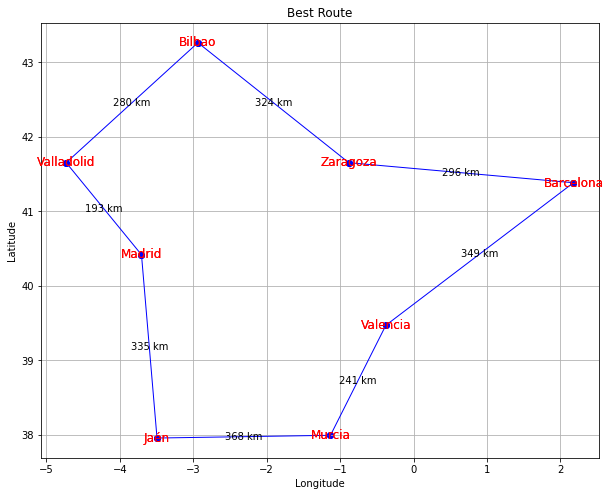

In [16]:
# Call the function to start the optimization with SigOpt
sigopt_optimization()

### ⊗ PSO

<p style='text-align: justify;'>
Finally, the PSO, following the same pattern as the other two algorithms:
</p>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

cities = ['Bilbao', 'Zaragoza', 'Madrid', 'Barcelona', 'Valencia', 'Murcia', 'Jaén', 'Valladolid']
connections = {
    'Bilbao': {'Madrid': 395, 'Valladolid': 280, 'Zaragoza': 324},
    'Zaragoza': {'Madrid': 325, 'Bilbao': 324, 'Barcelona': 296},
    'Madrid': {'Murcia': 401, 'Zaragoza': 325, 'Bilbao': 395, 'Jaén': 135, 'Valladolid': 193},
    'Barcelona': {'Valencia': 349, 'Zaragoza': 296},
    'Valencia': {'Murcia': 241, 'Barcelona': 349},
    'Murcia': {'Jaén': 368, 'Madrid': 401, 'Valencia': 241},
    'Jaén': {'Murcia': 368, 'Madrid': 335},
    'Valladolid': {'Bilbao': 280, 'Madrid': 193}
}

class Particle:
    def __init__(self, connections):
        self.position = list(connections.keys())
        random.shuffle(self.position)
        self.best_position = self.position
        self.best_fitness = fitness(self.position, connections)
        

def fitness(route, connections):
    total_distance = 0
    for i in range(len(route) - 1):
        if route[i+1] in connections[route[i]]:
            total_distance += connections[route[i]][route[i+1]]
        else:
            # If the connection does not exist, we can set it to infinite.
            total_distance += float('inf')
    return total_distance

def distance(city1, city2, connections):
    if city2 in connections[city1]:
        return connections[city1][city2]
    else:
        # If the connection does not exist, we can set it to infinite.
        return float('inf')

def heuristic_crossover(x1, x2, connections):
    n = len(x1) - 1
    v = random.choice(x1)
    x = [v]

    x1.remove(v)
    x1.insert(0, v)
    x2.remove(v)
    x2.insert(0, v)

    i = 1
    j = 1

    while i <= n and j <= n:
        if x1[i] in x and x2[j] in x:
            i += 1
            j += 1
        elif x1[i] in x:
            x.append(x2[j])
            j += 1
        elif x2[j] in x:
            x.append(x1[i])
            i += 1
        else:
            u = x[-1]
            if distance(u, x1[i], connections) < distance(u, x2[j], connections):
                x.append(x1[i])
                i += 1
            else:
                x.append(x2[j])
                j += 1
    return x

def PSO(cities, connections, n_particles, n_iterations):
    # Creating particles
    particles = [Particle(connections) for _ in range(n_particles)]

    # Initializing global_best_position and global_best_fitness
    global_best_position = particles[0].position
    global_best_fitness = particles[0].best_fitness

    for _ in range(n_iterations):
        # Checking each route
        for particle in particles:
            current_fitness = fitness(particle.position, connections)

            # Update pbest
            if current_fitness < particle.best_fitness:
                particle.best_fitness = current_fitness
                particle.best_position = particle.position

            # Update gbest
            if current_fitness < global_best_fitness:
                global_best_fitness = current_fitness
                global_best_position = particle.position
        # Update each route, using heuristic crossover (HC)
        for particle in particles:
            # Calculate new route using heuristic crossover with pbest and gbest
            particle.position = heuristic_crossover(particle.best_position, global_best_position, connections)

    return global_best_position, global_best_fitness

#### Intel® SigOpt Optimization

In [18]:
import sigopt
import random

# Set your SigOpt API TOKEN or use generic API TOKEN
SIGOPT_API_TOKEN = 'MJZRDBRNTMOPVYPCTTMRAMDIQDUEDTDJGOUMPFSIQTRKLYJJ'

# Configure the SigOpt client
conn = sigopt.Connection(client_token=SIGOPT_API_TOKEN)

def evaluate_pso(params):
    n_particles = params['n_particles']
    n_iterations = params['n_iterations']
    
    # Call the PSO algorithm and return the fitness value
    best_position, best_fitness = PSO(cities, connections, n_particles, n_iterations)
    
    return best_fitness

# Define the variables to be optimized and their ranges
param_space = [
    {'name': 'n_particles', 'type': 'int', 'bounds': {'min': 10, 'max': 100}},
    {'name': 'n_iterations', 'type': 'int', 'bounds': {'min': 50, 'max': 500}},
]

# Create an experiment on SigOpt
experiment = conn.experiments().create(
    name='TSP PSO Optimization',
    parameters=param_space,
    metrics=[{'name': 'best_fitness', 'objective': 'minimize'}]
)

# Run the optimization for a number of iterations
for _ in range(30):
    suggestion = conn.experiments(experiment.id).suggestions().create()
    suggestion_id = suggestion.id
    
    # Get the suggested hyperparameters
    suggested_params = suggestion.assignments
    
    # Evaluate the performance with the suggested hyperparameters
    result = evaluate_pso(suggested_params)
    
    # Report the results to SigOpt
    conn.experiments(experiment.id).observations().create(
        suggestion=suggestion_id,
        value=result,
    )

# Get the best optimization results
best_assignments = conn.experiments(experiment.id).best_assignments().fetch()

# Print the best-found hyperparameters
print("Best hyperparameters found:")
print(best_assignments.data[0].assignments)

# Run the PSO with the best-found hyperparameters
best_params = best_assignments.data[0].assignments
best_position, best_fitness = PSO(cities, connections, best_params['n_particles'], best_params['n_iterations'])

# Print the best position and fitness found
print("Best position found:", best_position)
print("Best fitness found:", best_fitness)

Best hyperparameters found:
Assignments({
  "n_iterations": 500,
  "n_particles": 95
})
Best position found: ['Bilbao', 'Valencia', 'Valladolid', 'Murcia', 'Jaén', 'Madrid', 'Zaragoza', 'Barcelona']
Best fitness found: 1818


## Summary

The Intel® SigOpt offers an advanced and scalable solution capable of impacting the performance of any AI model. Whether working on simulations, genetic algorithms, ant colony optimization, particle swarm optimization, or anything in between, researchers can use Intel® SigOpt to track, analyze, and tune their models for more efficient experiments, optimize, and, ultimately, model at scale.

## Clear the memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [ ]:
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)

## Next

Congratulations, you have completed second part the learning objectives of the course! As a final exercise, successfully complete an applied problem in the assessment in [_06-bio-inspired-assessment.ipynb_](06-bio-inspired-assessment.ipynb).